In [1]:
library(ggvenn)
library(tidyverse)
library(RColorBrewer)
library(eulerr)
library(ggplotify)

# Custom package
library(rutils)

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: grid

Loading required package: ggplot2

-- Attaching packages -------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.6     v purrr   0.3.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ----------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
projects <- c("CESC", "UCS", "UCEC")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
matrisome_path <- paste0(dirs$data_dir, "/matrisome/matrisome_hs_masterlist.tsv")

In [3]:
dset_idx <- 3
save_res <- TRUE

In [4]:
text_size <- 8
label_size <- 10
guide_size <- 1
family <- "ArialMT"
dpi <- 320
vd_ht <- 3
vd_wd <- vd_ht
pt_to_mm <- 5 / 14

In [5]:
matrisome_df <- load_matrisome_df(matrisome_path)
demg_list <- read_lines(paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets[dset_idx], "_demg_list.txt"))
figo_umsmg_list <- read_lines(paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets[dset_idx], "_figo_umsmg_list.txt"))
figo_nsmg_list <- read_lines(paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets[dset_idx], "_figo_nsmg_list.txt"))
# figo_list <- figo_umsmg_list %>%
#     union(figo_nsmg_list)
survival_list <- read_lines(paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets[dset_idx], "_survival_umsmg_list.txt"))

# umsmg_list <- read_lines(paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets[dset_idx], "_umsmg_list.txt"))
# nsmg_list <- read_lines(paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets[dset_idx], "_nsmg_hub_thresh_", hub_con_thresh, "_list.txt"))



-- Column specification -------------------------------------------------------------------------------------------------
cols(
  Division = col_character(),
  Category = col_character(),
  `Gene Symbol` = col_character(),
  `Gene Name` = col_character(),
  Synonyms = col_character(),
  HGNC_IDs = col_double(),
  `HGNC_IDs Links` = col_double(),
  UniProt_IDs = col_character(),
  Refseq_IDs = col_character(),
  Orthology = col_character(),
  Notes = col_character()
)




In [6]:
figo_venn_df <- tibble(geneID = matrisome_df$gene_symbol) %>%
    dplyr::mutate(
        demg = geneID %in% demg_list,
        figo_umsmg = geneID %in% figo_umsmg_list,
        figo_nsmg = geneID %in% figo_nsmg_list
    ) %>%
    dplyr::filter(demg == TRUE | figo_umsmg == TRUE | figo_nsmg == TRUE)

surv_venn_df <- tibble(geneID = matrisome_df$gene_symbol) %>%
    dplyr::mutate(
        demg = geneID %in% demg_list,
        surv_umsmg = geneID %in% survival_list,
    ) %>%
    dplyr::filter(demg == TRUE | surv_umsmg == TRUE)

In [7]:
figo_venn_df$demg %>% sum()
figo_venn_df$figo_umsmg %>% sum()
figo_venn_df$figo_nsmg %>% sum()

surv_venn_df$demg %>% sum()
surv_venn_df$surv_umsmg %>% sum()

[1] 618

[1] 33

[1] 263

[1] 618

[1] 49

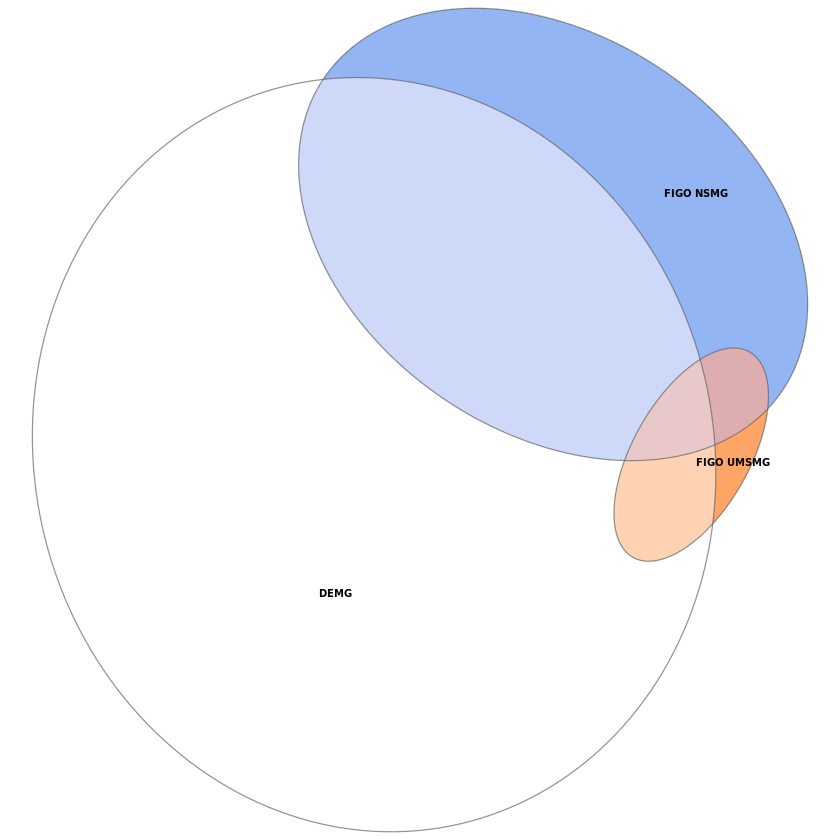

In [8]:
set.seed(123)
figo_euler_df <- figo_venn_df %>%
    column_to_rownames("geneID") %>%
    rename(`DEMG` = demg, `FIGO UMSMG` = figo_umsmg, `FIGO NSMG` = figo_nsmg)

figo_euler_fit <- euler(figo_euler_df, shape = "ellipse")

plot(
    figo_euler_fit,
    adjust_labels = TRUE,
    labels = list(fontsize = (text_size - 2)),
#     quantities = list(fontsize = text_size - 2, col = "gray10"),
    # Must be in same order as DF columns
#     fills = list(fill = c(`DEMG` = "gray100", `FIGO UMSMG` = "cornflowerblue", `FIGO NSMG` = "aquamarine1")),
    fills = list(fill = c(`DEMG` = "gray100", `FIGO UMSMG` = "chocolate1", `FIGO NSMG` = "cornflowerblue")),
    edges = list(lwd = 1, alpha = .5, col = "gray40"),
    alpha = 0.7
) %>% as.ggplot()
figo_plot <- last_plot()

In [9]:
ggsave(filename = paste0(dirs$figures_dir, "/gene_lists/", unified_dsets[dset_idx], "_figo_overlap_euler.png"), figo_plot, height = vd_ht, width = vd_wd, dpi = dpi)

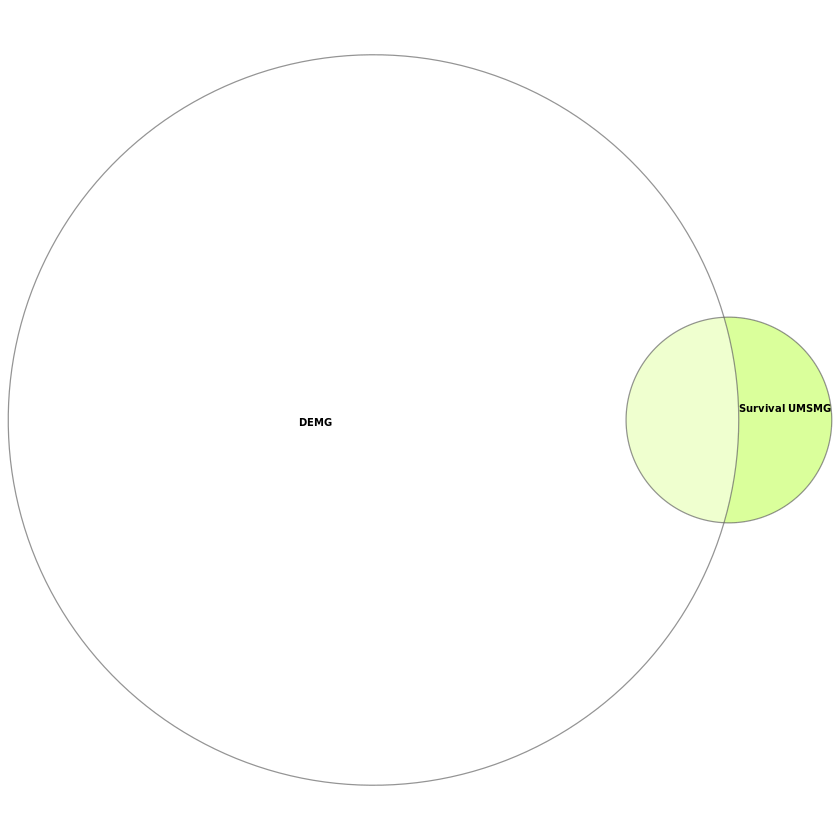

In [10]:
set.seed(123)
surv_euler_df <- surv_venn_df %>%
    column_to_rownames("geneID") %>%
    rename(`DEMG` = demg, `Survival UMSMG` = surv_umsmg)

surv_euler_fit <- euler(surv_euler_df, shape = "ellipse")

plot(
    surv_euler_fit,
    adjust_labels = TRUE,
    labels = list(fontsize = (text_size - 2)),
#     quantities = list(fontsize = text_size - 2, col = "gray10"),
    # Must be in same order as DF columns
#     fills = list(fill = c(`DEMG` = "gray100", `FIGO UMSMG` = "cornflowerblue", `FIGO NSMG` = "aquamarine1")),
    fills = list(fill = c(`DEMG` = "gray100", `Survival UMSMG` = "darkolivegreen1")),
    edges = list(lwd = 1, alpha = .5, col = "gray40"),
    alpha = 0.7
) %>% as.ggplot()
surv_plot <- last_plot()

In [11]:
assign(paste0(projects[dset_idx], "_figo"), figo_plot)
assign(paste0(projects[dset_idx], "_surv"), surv_plot)
save(
    list = c(paste0(projects[dset_idx], "_figo"), paste0(projects[dset_idx], "_surv")),
    file = paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[dset_idx], "_list_defplots.RData")
)